<a href="https://colab.research.google.com/github/ITU-Business-Analytics-Team/Business_Analytics_for_Professionals/blob/main/Part%20I%20%3A%20Methods%20%26%20Technologies%20for%20Business%20Analytics/Chapter%206%3A%20Feature%20Engineering/6_5_Global_Search_Methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Feature Engineering**
## Global Search Methods

[Dataset](https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)): from Kaggle

The ideal number of features in a prediction model is determined using some optimization algorithms in this section.

Heuristic algorithms will be used for optimization.

These algorithms are Genetic algorithm, Randomized search algorithm and Hill Climbing Algorithm.

### **1. Pure Naive Bayes Model Multinomial NB Alpha Default**

**Naive Bayes**

Conditional probability calculation formula invented by Thomas Bayes in 1812. Naive Bayes determines the class in which the final state is located with Conditional probability ratio of all features. 

**Formula of Naive Bayes:**



$Pr[Class|Predictors]=(Pr[Class]×Pr[Predictors|Class|])/Pr[Predictors]$

**Predictors:** Predictors represent the features requested from the customer. Our dataset consists of 11 different features.

**Pr[Class|Predictors]:** It indicates how close it is probabilistic to which class according to the characteristics of the customer.


**Pr[Class]/Pr[Predictors]:**  Statistically close to a class if we don't have any property information about the client.

**Pr[Predictors|Class|]:** The status of which statistical class a client will be for each property.


 **PROBLEM DATA**

We determined a dataset for the case study. There are two classes in dataset according to whether they are suitable for credit or not. In the study, the bank wants to determine the credit status of the customer who applies for a loan. What is the probability of each credit class according to bank customer’s predictor data?  The dataset created by the bank is used as a train set and a test set for its previous customers.

In [ ]:
pip install -U scikit-learn

     |████████████████████████████████| 23.2 MB 1.3 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


(425, 11) (425,)
accuracy_score: 0.7529411764705882
mean square error: 0.24705882352941178

		-----ROC VALUE----


<Figure size 432x288 with 0 Axes>

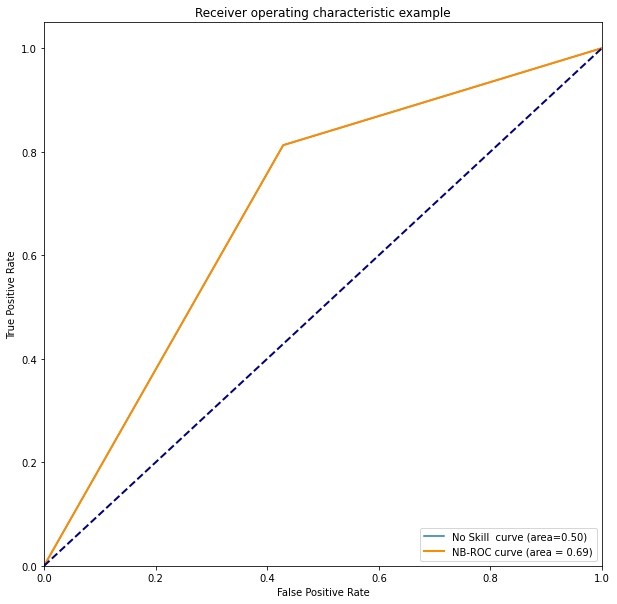

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.io as sio
from sklearn.model_selection import train_test_split
from matplotlib import pyplot 
from sklearn.metrics import mean_squared_error,roc_auc_score,mean_absolute_percentage_error,roc_curve, auc,roc_auc_score,accuracy_score
from sklearn.naive_bayes import MultinomialNB

#mat = pd.read_csv("CreditRisk.csv")
url = "https://drive.google.com/file/d/1038z5e5nQB0UH_xiFKCOGQN7J4x9ImK4/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
mat = pd.read_csv(path)

y = mat.iloc[:,11]
x=mat.iloc[:,:-1]

y=y.to_numpy()
x=x.to_numpy()

print(x.shape, y.shape)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = MultinomialNB()
model.fit(x_train,y_train.ravel())
y_score_pred = model.predict(x_test) 

# accuracy_score
accuracy_score = accuracy_score (y_test, y_score_pred ) 
print ( 'accuracy_score:', accuracy_score)

# mean_squared_error
mse_test = mean_squared_error(y_test.ravel(),y_score_pred)  

print ( 'mean square error:', mse_test)


# ROC CURVE
print("\n\t\t-----ROC VALUE----");
fpr, tpr, _ = roc_curve(y_test, y_score_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.subplots(figsize=(10, 10));
pyplot.plot(fpr, tpr, label='No Skill  curve (area=0.50)')
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='NB-ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

**Accuracy score:**
Represents the accuracy value of subset classes in multi-class distinctions. Large values of true negative and true positive indicate that the classification is more successful.


**Receiver Operating Characteristic:**
Roc is used to measure output quality. The Roc curve shows the true positive rate on the y-axis and the false positive rate on the x-axis. The larger the area under the AUC curve, the stronger the selectivity of the model.


## EXTRA  (Determine Deal Alpha Value for Naive Bayes)

### Pure Naive Bayes Model Multinomial NB Alpha is optimized by RandomizedSearchCV (accuracy)

Randomized search on hyper parameters.

RandomizedSearchCV implements a “fit” and a “score” method. It also implements “score_samples”, “predict”, “predict_proba”, “decision_function”, “transform” and “inverse_transform” if they are implemented in the estimator used.

The parameters of the estimator used to apply these methods are optimized by cross-validated search over parameter settings.

In contrast to GridSearchCV, not all parameter values are tried out, but rather a fixed number of parameter settings is sampled from the specified distributions. The number of parameter settings that are tried is given by n_iter.

If all parameters are presented as a list, sampling without replacement is performed. If at least one parameter is given as a distribution, sampling with replacement is used. It is highly recommended to use continuous distributions for continuous parameters.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import scipy.stats as stats
from sklearn.naive_bayes import MultinomialNB
from scipy.stats import uniform
from scipy.stats import expon
from sklearn.metrics import mean_squared_error,roc_auc_score,mean_absolute_percentage_error,roc_curve, auc,roc_auc_score,accuracy_score
from matplotlib import pyplot 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.utils.fixes import loguniform
#mat = pd.read_csv("CreditRisk.csv")
url = "https://drive.google.com/file/d/1038z5e5nQB0UH_xiFKCOGQN7J4x9ImK4/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
mat = pd.read_csv(path)
y = mat.iloc[:,11]
x=mat.iloc[:,:-1]

y=y.to_numpy()
x=x.to_numpy()

print(x.shape, y.shape)

x, x_score, y, y_score = train_test_split(x, y, test_size=0.1, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.11, random_state=42)

credit_save, credit_size, r2_test_save, mse_test_save, = [], [], [], []

lab_enc = preprocessing.LabelEncoder()

y_train = lab_enc.fit_transform(y_train.ravel())



param_distributions= [{'alpha':uniform.rvs(loc=0, scale=1, size=1000, random_state=42)}]


estimator =  MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)
selector = RandomizedSearchCV(estimator, 
                               param_distributions,
                               n_iter=1000, 
                               scoring='accuracy', 
                               n_jobs=-1, 
                               refit=True, 
                               cv=5, 
                               verbose=2, 
                               random_state= 42,  
                               return_train_score=False)
                        
selector = selector.fit(x_train, y_train.ravel())



print ( 'number of valid variables:', selector.n_features_in_)    
print(selector.best_params_)

# naive  best param
estimator.fit(x_test, y_test.ravel())
y_score_pred = estimator.predict(x_score) 
accuracy_score = accuracy_score (y_score, y_score_pred ) # 3th part of data %10 
mse_test = mean_squared_error(y_score.ravel(),y_score_pred)  
mse_test_save.append(mse_test)
#accuracy_score_save.append(accuracy_score)
print ( 'mean square error:', mse_test)
print ( 'accuracy_score:', accuracy_score)

(425, 11) (425,)
Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
number of valid variables: 11
{'alpha': 0.3745401188473625}
mean square error: 0.20930232558139536
accuracy_score: 0.7906976744186046


<Figure size 432x288 with 0 Axes>

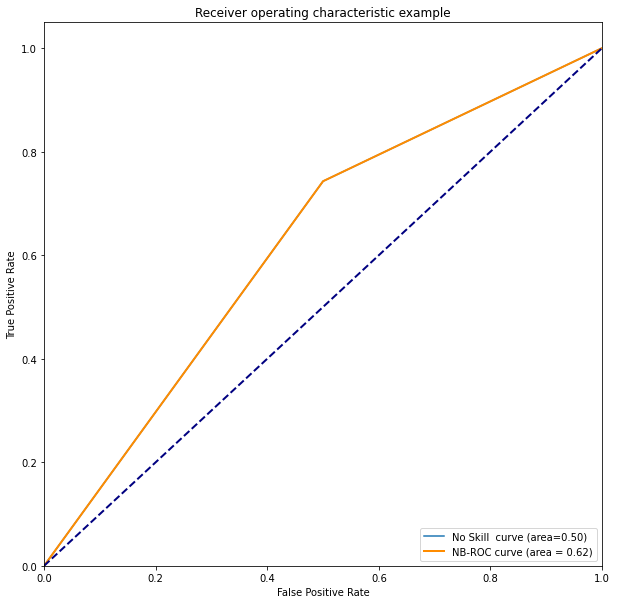

In [ ]:
# ROC CURVE
fpr, tpr, _ = roc_curve(y_test, y_score_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.subplots(figsize=(10, 10))
pyplot.plot(fpr, tpr, label='No Skill  curve (area=0.50)')
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='NB-ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### Pure Model MultinomialNB is optimized by RandomizedSearchCV (roc_auc)


(425, 11) (425,)
Fitting 10 folds for each of 1000 candidates, totalling 10000 fits
number of valid variables: 11
{'alpha': 0.2095778423702107}


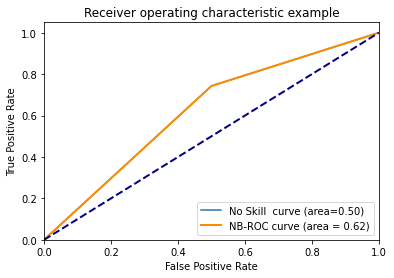

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import scipy.stats as stats
from sklearn.naive_bayes import MultinomialNB
from scipy.stats import uniform
from scipy.stats import expon
from sklearn.metrics import mean_squared_error,roc_auc_score,mean_absolute_percentage_error,roc_curve, auc,roc_auc_score,accuracy_score,completeness_score,brier_score_loss

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.utils.fixes import loguniform

from matplotlib import pyplot 

url = "https://drive.google.com/file/d/1038z5e5nQB0UH_xiFKCOGQN7J4x9ImK4/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
mat = pd.read_csv(path)
y = mat.iloc[:,11]
x=mat.iloc[:,:-1]
y=y.to_numpy()
x=x.to_numpy()

print(x.shape, y.shape)

x, x_score, y, y_score = train_test_split(x, y, test_size=0.1, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.11, random_state=42)

credit_save, credit_size, r2_test_save, mse_test_save, = [], [], [], []

lab_enc = preprocessing.LabelEncoder()

y_train = lab_enc.fit_transform(y_train.ravel())



param_distributions= [{'alpha':uniform.rvs(loc=0, scale=1, size=10000, random_state=10)}]# 


estimator =  MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)
selector = RandomizedSearchCV(estimator, 
                               param_distributions,
                               n_iter=1000, 
                               scoring='roc_auc', 
                               n_jobs=-1, 
                               refit=True, 
                               cv=10, 
                               verbose=2, 
                               random_state= 42,  
                               return_train_score=False)
                        
selector = selector.fit(x_train, y_train.ravel())

print ( 'number of valid variables:', selector.n_features_in_)    
print(selector.best_params_)

# naive  best param 

estimator =  MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)
estimator.fit(x_test, y_test.ravel())
y_score_pred = estimator.predict(x_score) 

# ROC CURVE
fpr, tpr, _ = roc_curve(y_test, y_score_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2

pyplot.plot(fpr, tpr, label='No Skill  curve (area=0.50)')
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='NB-ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### **2.  Genetic Algorithm**

### Pure Naive and Genetic (accuracy_score)

**Genetic algorithm (GA):**

Biological science has shown that those who adapt well to nature can survive. Genetic algorithm (GA) is an optimization tool based on gene differentiation and evolution of living things (Mitchell, 1998; Haupt et al., 1998). GA can find optimal or near-optimal solutions of complex problems (Mandal et al., 2006).



There are n genes in a chromosome with n features according to genetic algorithm. Whether or not each feature is in the model is a binary situation. Therefore, gene pairs of size N consisting of 0 and 1 try to find the optimal number of inputs with matches. Mating means exchanging some genes from 2 parents. Genes are diversified by the crossover process and the rate of this crossover is determined as the crossover parameter in the algorithm. This parameter determines the percentage of property change for the new solution proposal. In order to find different solutions, there may be random gene changes outside the parent's genes, this is provided by the mutation rate parameter. How many different individuals will be searched solution is determined by the population parameter. We provide that how many times the search will be repeated with the iteration parameter.

In [ ]:
pip install sklearn-genetic

     |████████████████████████████████| 160 kB 18.8 MB/s 


In [ ]:
from genetic_selection import GeneticSelectionCV
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error,roc_auc_score,mean_absolute_percentage_error,accuracy_score 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn import preprocessing


url = "https://drive.google.com/file/d/1038z5e5nQB0UH_xiFKCOGQN7J4x9ImK4/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
mat = pd.read_csv(path)
y = mat.iloc[:,11]
x=mat.iloc[:,:-1]

y=y.to_numpy()
x=x.to_numpy()
print(x.shape, y.shape) 
x, x_score, y, y_score = train_test_split(x, y, test_size=0.1, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.11, random_state=42)
print(x_train.shape, y_train.shape) 
Advertising_save, Advertising_size, accuracy_score_save, mse_test_save = [], [], [], []
lab_enc = preprocessing.LabelEncoder()

from genetic_selection import GeneticSelectionCV

# import your preferred ml model.

from sklearn.naive_bayes import MultinomialNB
estimator = MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)
selector = GeneticSelectionCV(estimator,
                              cv=10,
                              #scoring="roc_auc", # kümeleme olmadığı için kullanılmaz
                              scoring='accuracy',
                              max_features=11,
                              n_population=50,
                              crossover_proba=0.25,
                              mutation_proba=0.1,
                              n_generations=50000,
                              crossover_independent_proba=0.1,
                              mutation_independent_proba=0.5,
                              n_gen_no_change=2,
                              n_jobs=-1)
selector = selector.fit(x_train, y_train.ravel()) # first part of data %80 
print ('number of valid variables:', selector.n_features_)    
print("generation_scores: ",selector.generation_scores_)
x_score, x_test = x_score[:, selector.support_], x_test[:, selector.support_]
estimator.fit(x_test, y_test.ravel()) # second part of data %10 
y_score_pred = estimator.predict(x_score)   
accuracy_score = accuracy_score (y_score, y_score_pred ) # 3th part of data %10 
mse_test = mean_squared_error(y_score.ravel(),y_score_pred)
Advertising_save.append(list(selector.support_))  
Advertising_size.append(selector.n_features_)  
accuracy_score_save.append(accuracy_score)
mse_test_save.append(mse_test)
print ( 'accuracy_score:', accuracy_score , 'mean square error:', mse_test)
print ( 'Number of valid variables', Advertising_size)
print(selector.support_)

(425, 11) (425,)
(339, 11) (339,)
number of valid variables: 4
generation_scores:  [0.8171123 0.8171123 0.8171123]
accuracy_score: 0.813953488372093 mean square error: 0.18604651162790697
Number of valid variables [4]
[False  True  True False  True False False False False False  True]


### **Pure Naive and Genetic (roc_auc_score)**

In [ ]:
from genetic_selection import GeneticSelectionCV
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,roc_auc_score,mean_absolute_percentage_error,roc_curve, auc,roc_auc_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn import preprocessing
from matplotlib import pyplot 

url = "https://drive.google.com/file/d/1038z5e5nQB0UH_xiFKCOGQN7J4x9ImK4/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
mat = pd.read_csv(path)
y = mat.iloc[:,11]
x=mat.iloc[:,:-1]

y=y.to_numpy()
x=x.to_numpy()
print(x.shape, y.shape) 

x, x_score, y, y_score = train_test_split(x, y, test_size=0.1, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.11, random_state=10)

print(x_train.shape, y_train.shape) 

credit_save, credit_size, r2_test_save, mse_test_save = [], [], [], []
lab_enc = preprocessing.LabelEncoder()


from genetic_selection import GeneticSelectionCV
# import your preferred ml model.
from sklearn.naive_bayes import MultinomialNB
estimator = MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)

selector = GeneticSelectionCV(estimator,
                              cv=5,
                              scoring='roc_auc',
                              max_features=11,
                              n_population=12,
                              crossover_proba=0.5,
                              mutation_proba=0.2,
                              n_generations=50000,
                              crossover_independent_proba=0.5,
                              mutation_independent_proba=0.05,
                              n_gen_no_change=10,
                              n_jobs=-1)


selector = selector.fit(x_train, y_train.ravel())
print ( 'number of valid variables:', selector.n_features_)    
print("generation_scores: ",selector.generation_scores_)
x_score, x_test = x_score[:, selector.support_], x_test[:, selector.support_]
estimator.fit(x_test, y_test.ravel())
y_score_pred = estimator.predict(x_score)   
mse_test = mean_squared_error(y_score.ravel(),y_score_pred)
credit_save.append(list(selector.support_))  
credit_size.append(selector.n_features_)  
mse_test_save.append(mse_test)
print ( 'mean square error:', mse_test)
print ( 'Number of valid variables', credit_size)
print(selector.support_)

(425, 11) (425,)
(339, 11) (339,)
number of valid variables: 5
generation_scores:  [0.68628853 0.7308288  0.7308288  0.7308288  0.7308288  0.7308288
 0.7308288  0.7308288  0.7308288  0.7308288  0.7308288  0.7308288 ]
mean square error: 0.16279069767441862
Number of valid variables [5]
[False  True  True False False False False  True  True False  True]


### **roc_score and  Plot**

<Figure size 432x288 with 0 Axes>

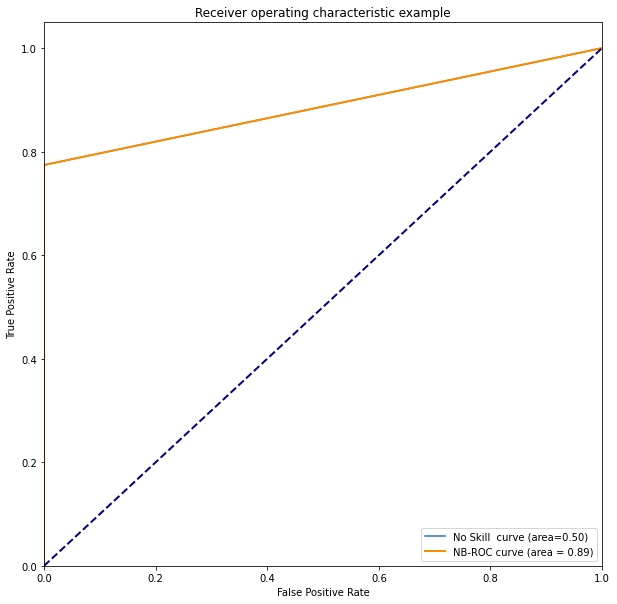

In [ ]:
y_score_pred_auc = roc_auc_score(y_score, y_score_pred)
fpr, tpr, _ = roc_curve(y_score, y_score_pred)

# Compute micro-average ROC curve and ROC area
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.subplots(figsize=(10, 10))
pyplot.plot(fpr, tpr, label='No Skill  curve (area=0.50)')
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='NB-ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### **3. Randomized search on hyper parameters (for features-accuracy_score)**

Random search gives successful results in hyperparameters, whether to determine optimal parameters or feature reduction. Random search initially generates and evaluates random samples of the objective function. It is particularly effective for complex problems because it assumes nothing about the structure of the objective function. Random search is also embedded in many algorithms. It is a method in which random combinations of algorithms are chosen and used to train a model. The algorithm finds the best random combinations of hyperparameters. 

In [ ]:

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,roc_auc_score,mean_absolute_percentage_error,roc_curve, auc,roc_auc_score,accuracy_score
import numpy as np
import pandas as pd
from matplotlib import pyplot 
import matplotlib.pyplot as plt

### **DATA**

In [ ]:
url = "https://drive.google.com/file/d/1038z5e5nQB0UH_xiFKCOGQN7J4x9ImK4/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
mat = pd.read_csv(path)
y = mat.iloc[:,11]
x=mat.iloc[:,:-1]

y=y.to_numpy()
x=x.to_numpy()
x, x_score, y, y_score = train_test_split(x, y, test_size=0.2, random_state=42)
data = x
target = y.ravel()

In [ ]:
estimator = MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)
naive = MultinomialNB()
np.mean(cross_val_score(naive, data,target,cv=5,scoring="accuracy"))

0.7382352941176471

In [ ]:
result = []
# Number of iterations
N_search = 100
# Random seed initialization
np.random.seed(1)
for i in range(N_search):
    # Generate a random number of features
    N_columns =  list(np.random.choice(range(data.shape[1]),1)+1)
    
    # Given the number of features, generate features without replacement
    columns = list(np.random.choice(range(data.shape[1]), N_columns, replace=False))
    
    # Perform k-fold cross validation
    scores = cross_val_score(naive,data[:,columns], target, cv=5, scoring="accuracy")
    
    # Store the result
    result.append({'columns':columns,'performance':np.mean(scores)})
    

print( scores )
# Sort the result array in descending order for performance measure
result.sort(key=lambda x : -x['performance'])

[0.83823529 0.77941176 0.79411765 0.79411765 0.82352941]


In [ ]:
a=result[0]['columns']
print("Optimized column rows:",np.sort(a))

Optimized column rows: [ 1  2  5  9 10]


In [ ]:
newdata= data[:,result[0]['columns']]
np.mean(cross_val_score(naive, newdata, target, cv=5, scoring='accuracy'))


x_score=(x_score[:,result[0]['columns']])
naive.fit(data[:,result[0]['columns']], target.ravel())
y_score_pred = naive.predict(x_score)  

accuracy_score = accuracy_score(y_score.ravel(), y_score_pred.ravel()) # burası kontrol edilecek
print("accuracy_score:", accuracy_score)
mse_test = mean_squared_error(y_score.ravel(), y_score_pred)
print("mse_test score:",mse_test)

accuracy_score: 0.8470588235294118
mse_test score: 0.15294117647058825


### **Randomized search on hyper parameters (for features-roc_score)**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,roc_auc_score,mean_absolute_percentage_error,roc_curve, auc,roc_auc_score,accuracy_score
import numpy as np
import pandas as pd
from matplotlib import pyplot 
import matplotlib.pyplot as plt

In [ ]:
url = "https://drive.google.com/file/d/1038z5e5nQB0UH_xiFKCOGQN7J4x9ImK4/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
mat = pd.read_csv(path)
y = mat.iloc[:,11]
x=mat.iloc[:,:-1]

y=y.to_numpy()
x=x.to_numpy()
x, x_score, y, y_score = train_test_split(x, y, test_size=0.2, random_state=10)

data = x
target = y.ravel()

In [ ]:
estimator = MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)
naive = MultinomialNB()
np.mean(cross_val_score(naive, data,target,cv=5,scoring="roc_auc"))

0.6573584905660377

In [ ]:
result = []
# Number of iterations
N_search = 1000
# Random seed initialization
np.random.seed(1)
for i in range(N_search):
    # Generate a random number of features
    N_columns =  list(np.random.choice(range(data.shape[1]),1)+1)
    
    # Given the number of features, generate features without replacement
    columns = list(np.random.choice(range(data.shape[1]), N_columns, replace=False))
    
    # Perform k-fold cross validation
    scores = cross_val_score(naive,data[:,columns], target, cv=5, scoring="roc_auc")
    
    # Store the result
    result.append({'columns':columns,'performance':np.mean(scores)})
    

print( scores )
# Sort the result array in descending order for performance measure
result.sort(key=lambda x : -x['performance'])

[0.62264151 0.77861635 0.71446541 0.64654088 0.59874214]


In [ ]:
a=result[0]['columns']
print("Optimized column rows:",np.sort(a))

Optimized column rows: [0 1 2 5 8 9]


mse_test score: 0.12941176470588237


<Figure size 432x288 with 0 Axes>

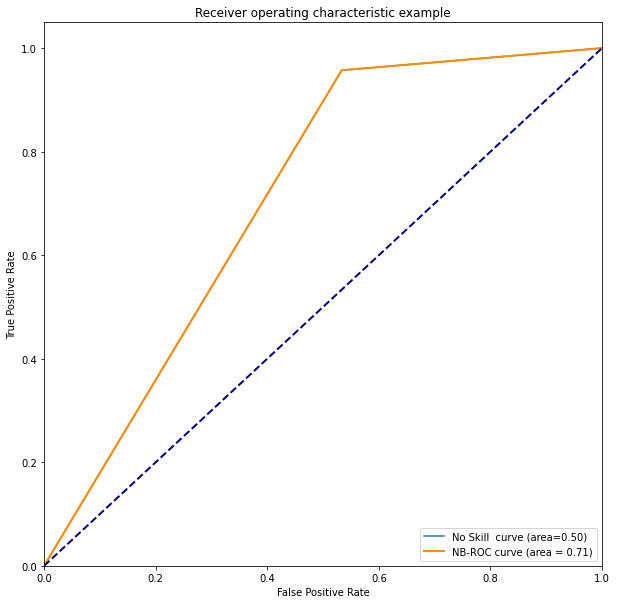

In [ ]:
newdata= data[:,result[0]['columns']]
np.mean(cross_val_score(naive, newdata, target, cv=5, scoring='accuracy'))
x_score=(x_score[:,result[0]['columns']])
naive.fit(data[:,result[0]['columns']], target.ravel())
y_score_pred = naive.predict(x_score) 
mse_test = mean_squared_error(y_score.ravel(), y_score_pred)
print("mse_test score:",mse_test)
y_score_pred_auc = roc_auc_score(y_score, y_score_pred)
fpr, tpr, _ = roc_curve(y_score, y_score_pred)
# Compute micro-average ROC curve and ROC area
roc_auc = auc(fpr, tpr)

plt.figure()
plt.subplots(figsize=(10, 10))
lw = 2

pyplot.plot(fpr, tpr, label='No Skill  curve (area=0.50)')
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='NB-ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### **4.Hillclimbing search on hyperparameters (for features) accurancy**

**Hill Climbing:**
This algorithm is used for both maximization and minimization problems. A simple hill climbing algorithm determines the direction according to their location by checking neighbor’s value. If our problem is a maximization problem, Hill Climbing algorithm walks towards the higher value of neighbors. 


**1. Simple Hill Climbing:**   The algorithm examines the neighboring nodes one by one and selects the first neighbor node as the next node which optimizes the current cost. 
    
**2. Steepest-Ascent hill climbing:** The algorithm first examines all neighboring nodes. The algorithm steps to the closest better solution. The small step ensures that the algorithm does not miss some solutions. Therefore, the algorithm is more likely to find the maximum or minimum points with the smallest step than with simple hill climbing.

**3. Stochastic hill climbing:**  The algorithm does not examine all neighboring nodes before deciding which node to choose. The algorithm just randomly picks a neighboring node. The algorithm decides whether to move to the new node or examine another node based on the amount of improvement in solution. The algorithm performs random steps by keeping a solution in memory. If the new solution is equal to or better than the current solution, it remembers that solution. Although the algorithm is a fast algorithm, it can be stuck at local minimum and maximum points. Step length is an important parameter for this algorithm. 


In [ ]:
from numpy import mean
from numpy.random import rand
from numpy.random import choice
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,roc_auc_score,mean_absolute_percentage_error,roc_curve, auc,roc_auc_score,accuracy_score
import numpy as np
import pandas as pd
from matplotlib import pyplot 
import matplotlib.pyplot as plt

### **Data**

In [ ]:
url = "https://drive.google.com/file/d/1038z5e5nQB0UH_xiFKCOGQN7J4x9ImK4/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
mat = pd.read_csv(path)
y = mat.iloc[:,11]
x=mat.iloc[:,:-1]

y=y.to_numpy()
x=x.to_numpy()
X, x_score, y, y_score = train_test_split(x, y, test_size=0.2, random_state=42)


#x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.11, random_state=42)
estimator = MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)
#estimator = MultinomialNB(alpha=15.601864044243651, fit_prior=True, class_prior=None)
naive = MultinomialNB()

In [ ]:
def objective(X, y, subset):
    # convert into column indexes
    ix = [i for i, x in enumerate(subset) if x]
    # check for now column (all False)
    if len(ix) == 0:
        return 0.0
    # select columns
    X_new = X[:, ix]
    # define model
    model = MultinomialNB()
    # evaluate model
    scores = cross_val_score(model, X_new, y, scoring='accuracy', cv=5, n_jobs=-1)
    # summarize scores
    result = mean(scores)
    return result, ix

# mutation operator (max step size)  new sample solution 
def mutate(solution, p_mutate):
    # make a copy
    child = solution.copy()
    for i in range(len(child)):
        # check for a mutation
        if rand() < p_mutate:
            # flip the inclusion
            child[i] = not child[i]
    return child

# hill climbing local search algorithm
def hillclimbing(X, y, objective, n_iter, p_mutate): #  
    output = []
    # generate an initial point
    solution = choice([True, False], size=X.shape[1])
    # evaluate the initial point
    solution_eval, ix = objective(X, y, solution)
    # run the hill climb
    for i in range(n_iter):
        # take a step
        candidate = mutate(solution, p_mutate)
    
        # evaluate candidate point
        candidate_eval, ix = objective(X, y, candidate)
        # check if we should keep the new point
        if candidate_eval >= solution_eval:
            # store the new point
            solution, solution_eval = candidate, candidate_eval
            output.append(solution_eval)
        # report progress
        #print('>%d f(%s) = %f' % (i+1, len(ix), solution_eval))
    return solution, solution_eval,output

### **Define the total iterations and optimization**

In [ ]:
# define the total iterations

n_iter = 1000
# probability of including/excluding a column
p_mut = 10.0 / 500.0
# perform the hill climbing search
subset, score,output = hillclimbing(X, y, objective, n_iter, p_mut)

# convert into column indexes
ix = [i for i, x in enumerate(subset) if x]


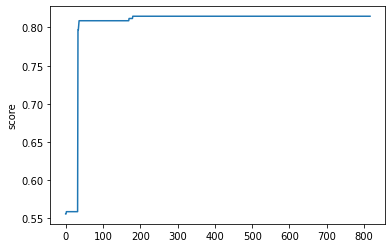

In [ ]:
plt.plot(output)
plt.ylabel('score')
plt.show()

### **Score Accuracy and MSE**

In [ ]:
model = MultinomialNB()
x_input = x_score[:, ix]
model.fit( X[:, ix],y.ravel())
y_score_pred = model.predict(x_input) 
accuracy_score = accuracy_score(y_score.ravel(), y_score_pred.ravel()) # burası kontrol edilecek
print("accuracy_score:", accuracy_score)
mse_test = mean_squared_error(y_score.ravel(), y_score_pred)
print("mse_test score:",mse_test)


accuracy_score: 0.8352941176470589
mse_test score: 0.16470588235294117


In [ ]:
print("Optimized feature",subset)
print("Optimized column rows:",ix)

Optimized feature [False False  True False False  True False False False  True  True]
Optimized column rows: [2, 5, 9, 10]


### **Hillclimbing search on hyperparameters ( for features)- roc_auc**

In [ ]:
from numpy import mean
from numpy.random import rand
from numpy.random import choice
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,roc_auc_score,mean_absolute_percentage_error,roc_curve, auc,roc_auc_score,accuracy_score
import numpy as np
import pandas as pd
from matplotlib import pyplot 
import matplotlib.pyplot as plt

In [ ]:
url = "https://drive.google.com/file/d/1038z5e5nQB0UH_xiFKCOGQN7J4x9ImK4/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
mat = pd.read_csv(path)
y = mat.iloc[:,11]
x=mat.iloc[:,:-1]

y=y.to_numpy()
x=x.to_numpy()
X, x_score, y, y_score = train_test_split(x, y, test_size=0.2, random_state=42)

model =  MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)

In [ ]:
def objective(X, y, subset):
    # convert into column indexes
    ix = [i for i, x in enumerate(subset) if x]
    # check for now column (all False)
    if len(ix) == 0:
        return 0.0
    # select columns
    X_new = X[:, ix]
    # define model
    model =  MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)
    # evaluate model
    scores = cross_val_score(model, X_new, y, scoring='accuracy', cv=5, n_jobs=-1)
    # summarize scores
    result = mean(scores)
    return result, ix

# mutation operator (max step size)  new sample solution 
def mutate(solution, p_mutate):
    # make a copy
    child = solution.copy()
    for i in range(len(child)):
        # check for a mutation
        if rand() < p_mutate:
            # flip the inclusion
            child[i] = not child[i]
    return child

# hill climbing local search algorithm
def hillclimbing(X, y, objective, n_iter, p_mutate): #  
    output=[]
    # generate an initial point
    solution = choice([True, False], size=X.shape[1])
    # evaluate the initial point
    solution_eval, ix = objective(X, y, solution)
    # run the hill climb
    for i in range(n_iter):
        # take a step
        candidate = mutate(solution, p_mutate)
    
        # evaluate candidate point
        candidate_eval, ix = objective(X, y, candidate)
        # check if we should keep the new point
        if candidate_eval >= solution_eval:
            # store the new point
            solution, solution_eval = candidate, candidate_eval
            output.append(solution_eval)
        # report progress
        #print('>%d f(%s) = %f' % (i+1, len(ix), solution_eval))
    return solution, solution_eval,output

### **Define the total iterations**

In [ ]:
n_iter = 100
# probability of including/excluding a column
p_mut = 10.0 / 500.0
# perform the hill climbing search
subset, score,output = hillclimbing(X, y, objective, n_iter, p_mut)
# convert into column indexes
ix = [i for i, x in enumerate(subset) if x]

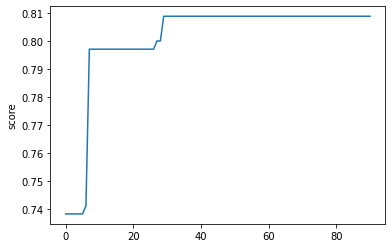

In [ ]:
plt.plot(output)
plt.ylabel('score')
plt.show()

### **Features**

In [ ]:
print("Optimized feature",subset)
print("Optimized column rows:",ix)


Optimized feature [ True False  True False False  True False  True  True  True  True]
Optimized column rows: [0, 2, 5, 7, 8, 9, 10]


mse_test score: 0.16470588235294117


<Figure size 432x288 with 0 Axes>

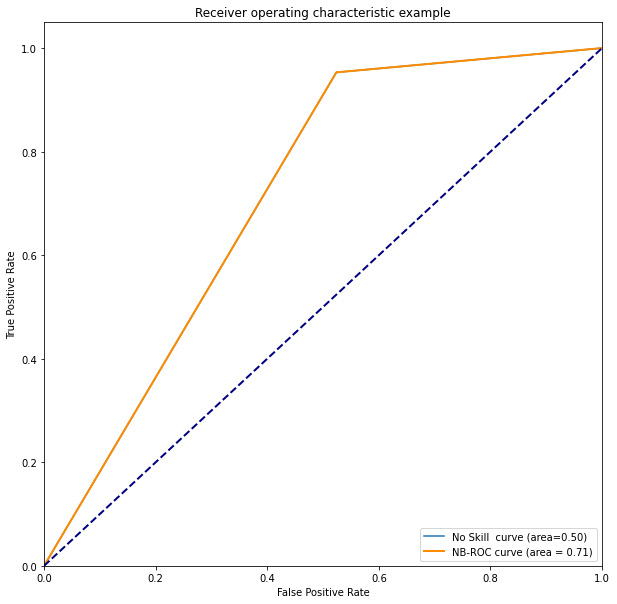

In [ ]:
;#model = MultinomialNB(alpha=1.0, fit_prior=False, class_prior=None)
estimator = MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)
x_input = x_score[:, ix]
estimator.fit( X[:, ix],y.ravel())
y_score_pred = estimator.predict(x_input) 
mse_test = mean_squared_error(y_score.ravel(), y_score_pred)
print("mse_test score:",mse_test);

y_score_pred_auc = roc_auc_score(y_score.ravel(), y_score_pred)

fpr, tpr, _ = roc_curve(y_score, y_score_pred)
# Compute micro-average ROC curve and ROC area
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.subplots(figsize=(10, 10))
pyplot.plot(fpr, tpr, label='No Skill  curve (area=0.50)')
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='NB-ROC curve (area = %0.2f)' % roc_auc);

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show();